    Junction  Elevation    Demand   Pattern
0       J511     105.08  1.763868  DMA2_pat
1       J411       8.95  1.333560  DMA1_pat
2       J414      34.36  1.448797  DMA1_pat
3       J415      65.00  0.000000       NaN
4       J416      42.60  0.000000       NaN
..       ...        ...       ...       ...
394       N7      46.30  1.384615  DMA3_pat
395       N8      45.90  0.807692  DMA3_pat
396       N9      45.00  0.980769  DMA3_pat
397      N10      45.10  0.807692  DMA3_pat
398      N11      47.46  0.000000       NaN

[399 rows x 4 columns]
399
    Junction  Elevation    Demand   Pattern  Node_No
0       J511     105.08  1.763868  DMA2_pat        0
1       J411       8.95  1.333560  DMA1_pat        1
2       J414      34.36  1.448797  DMA1_pat        2
3       J415      65.00  0.000000       NaN        3
4       J416      42.60  0.000000       NaN        4
..       ...        ...       ...       ...      ...
394       N7      46.30  1.384615  DMA3_pat      394
395       N8      45

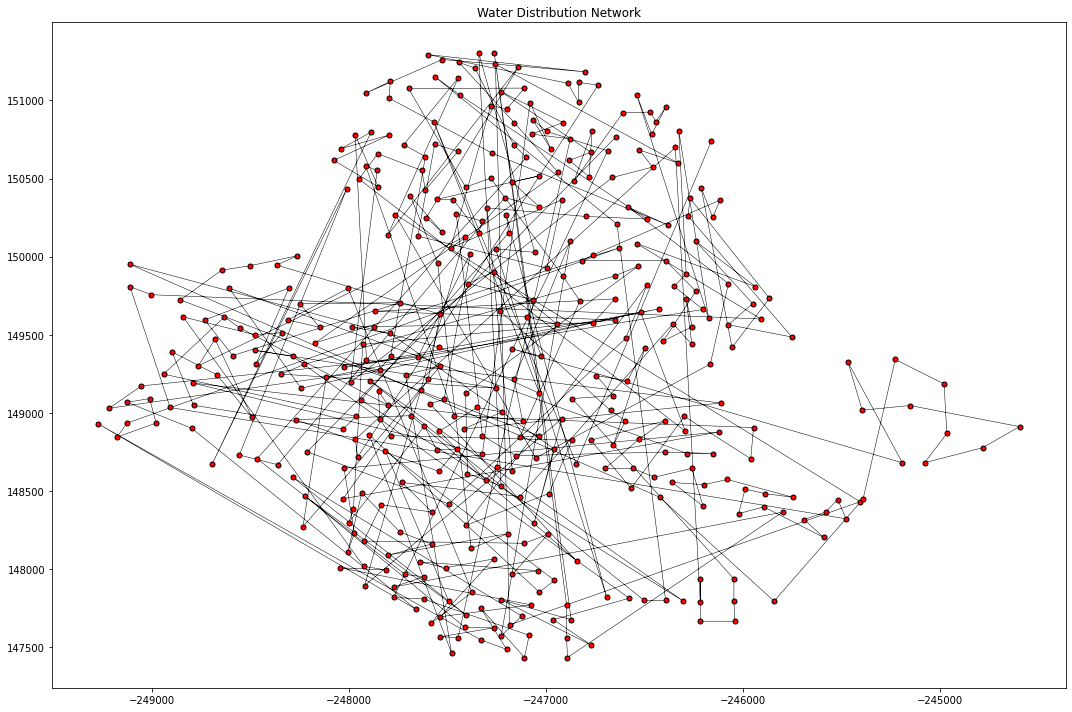

1.0583146992556394
[[('101010011', 2.151474231), ('101000101', 2.122750385), ('000010100', 1.312171154), ('011011000', 0.756243462), ('100111100', 1.004011154), ('010111111', 2.307386538), ('001001010', 0.724163077), ('100011100', 0.0), ('010110100', 2.308613077), ('100110111', 1.041620769), ('010010010', 1.474481538), ('111101110', 0.0), ('100000001', 1.077860769), ('001101101', 1.636248462), ('101010011', 2.151474231), ('001010010', 2.284294615), ('111010101', 0.0), ('000111011', 1.616466923), ('000010010', 2.373893077), ('010110101', 1.550524615), ('000011111', 0.0), ('010011101', 0.224741538), ('101011111', 6.306651923), ('011001100', 1.057295769), ('000011010', 1.556741538), ('000001100', 2.156548846), ('100001011', 1.083642692), ('001111110', 1.642638462), ('011000110', 2.491929231), ('001101100', 2.346363462), ('101011111', 6.306651923), ('110100010', 0.0), ('011111110', 1.586428846), ('111001100', 0.0), ('101010011', 2.151474231), ('000101001', 2.498536154), ('001101101', 1.636

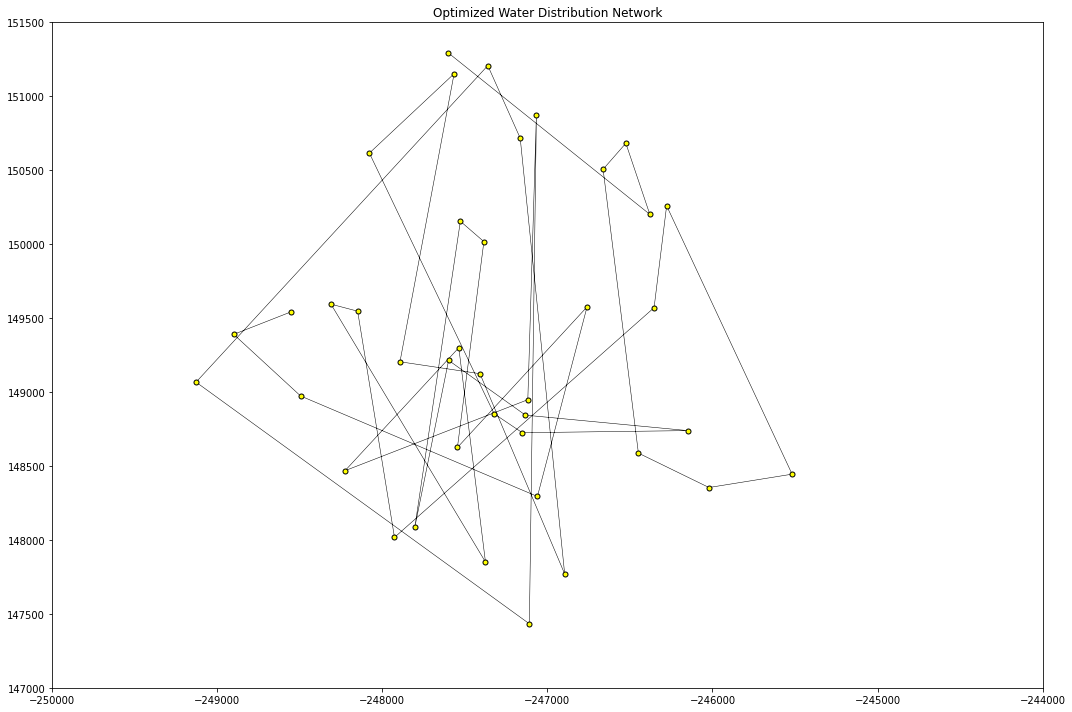

In [4]:
# C:\\Users\\DELL\\Desktop\\Others\\MyProj1.csv
#!/usr/bin/env python
# coding: utf-8
# WITH TARGET = 50

# In[1]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2


# In[2]:


var = pd.read_csv("C:\\Users\\DELL\\Downloads\\Demand_Coverage.csv")
print(var)

# In[3]:


population_size = 0
for i in range(len(var)):
    population_size += 1
print(population_size)


# In[4]:


lst = []
for i in range(0,population_size):
    lst.append(i)
s = pd.Series(lst)
var['Node_No'] = s.values
print(var)

# In[5]:

var4 = pd.read_csv("C:\\Users\\DELL\\Desktop\\Others\\MyProj1.csv")
#print(var4)
x2,y2 = (var4['X-Coord'],var4['Y-Coord'])
plt2.rcParams["figure.figsize"] = (15,10)
plt2.title("Water Distribution Network")
plt2.plot(x2,y2,color='black', linestyle='solid', linewidth = 0.5,
         marker='o', markerfacecolor='red', markersize=5)
plt2.show()

#Function to convert numeric value to Binary String
def Dec_to_bin(key_one):
    if key_one in range(512):
        bin_key_one = f'{key_one:09b}'
        return bin_key_one
    else:
        print("You have to enter key (0 <= key <= 511)")


# In[6]:


# Creation of a list of tuples containing node_no and corresponding demand.
demand = []
demand = var['Demand'].to_list()
node_no = []
node_no = var['Node_No'].to_list()
for i in range(0,len(node_no)):
    node_no[i] = Dec_to_bin(node_no[i])
pop_data = list(zip(node_no,demand))
#print(pop_data)


# In[7]:


#Adding unutilised nodes with demand 0 inside population_data.
import random
for i in range(population_size,512):
    pop_data.append((Dec_to_bin(i),0.0))
# Finding average of total demand of all the nodes in the network in WDNs.
total_demand = 0
for i in range(0,population_size):
    total_demand += demand[i]
average_demand = total_demand/population_size
print(average_demand)


# In[91]:


# Python3 program to create target string, starting from
# random string using Genetic Algorithm

import random

# Number of individuals in each generation
POPULATION_SIZE = 50

# Valid genes
#GENES = '''abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOP
#QRSTUVWXYZ 1234567890, .-;:_!"#%&/()=?@${[]}'''

# Target string to be generated
TARGET = 50

class Individual(object):
	'''
	Class representing individual in population
	'''
	global pop_data
	global average_demand
	def __init__(self, chromosome):
		self.chromosome = chromosome
		self.fitness = self.cal_fitness()

	@classmethod
	def mutated_genes(self):
		'''
		create random genes for mutation
		'''
		#global GENES
		gene = random.choice(pop_data) # In this line, I have to choose a node from 512 nodes ie sensors 
		return gene

	@classmethod
	def create_gnome(self):
		'''
		create chromosome or string of genes
		'''
		#global TARGET
		gnome_len = TARGET
		return [self.mutated_genes() for _ in range(gnome_len)] # gnome_length= no of sensors after optimisation.


	def mate(self, par2):
		'''
		Perform mating and produce new offspring
		'''
		# chromosome for offspring
		child_chromosome = []
		for gp1, gp2 in zip(self.chromosome, par2.chromosome):

			# random probability
			prob = random.random()

			# if prob is less than 0.45, insert gene
			# from parent 1
			if prob < 0.45:
				child_chromosome.append(gp1)

			# if prob is between 0.45 and 0.90, insert
			# gene from parent 2
			elif prob < 0.90:
				child_chromosome.append(gp2)

			# otherwise insert random gene(mutate),
			# for maintaining diversity
			else:
				child_chromosome.append(self.mutated_genes())

		# create new Individual(offspring) using
		# generated chromosome for offspring
		return Individual(child_chromosome)

	def cal_fitness(self):
		'''
		Calculate fitness score, it is the number of
		characters in string which differ from target
		string.
		'''
		global TARGET
		fitness = 0
		for g in self.chromosome:
			fitness = fitness + g[1]
		fitness = fitness/TARGET
		return fitness
# 	gnome = Individual.create_gnome()
# 	print(gnome)
# 	population = []
# 	population.append(Individual(gnome))
# 	print(Individual.get_fitness())

#Driver code
def main():
	global POPULATION_SIZE
	global TARGET
	global average_demand
	#current generation
	generation = 1

	found = False
	population = []
	counter = 0
	temp_pop = []
	# create initial population
	for i in range(POPULATION_SIZE):
				gnome = Individual.create_gnome()   
				population.append([gnome,Individual(gnome).fitness]) # population array containing 50 sets of population of size 20.
# 	population = sorted(population,key = lambda x:x[1],reverse = True)
# # 	print(population[0])
# 	new = []
# 	new.extend(population[:5])
# 	parent1 = random.choice(population[:25])
# 	parent2 = random.choice(population[:25])
# 	print(parent1[0])
    
    
# 	print(parent1)
    
	while not found:

		# sort the population in increasing order of fitness score
		population = sorted(population, key = lambda x:x[1],reverse = True)

		# if the individual having lowest fitness score ie.
		# 0 then we know that we have reached to the target
		# and break the loop
		if population[0][1]/ average_demand >= 1.5:
			found = True
			break

		# Otherwise generate new offsprings for new generation
		new_generation = []

		# Perform Elitism, that mean 10% of fittest population
		# goes to the next generation
		s = int((10*POPULATION_SIZE)/100)
		new_generation.extend(population[:s])

		# From 50% of fittest population, Individuals
		# will mate to produce offspring
		s = int((90*POPULATION_SIZE)/100)
		for _ in range(s):
			parent1 = random.choice(population[:25])
			parent2 = random.choice(population[:25])
			p1 = parent1[0]
			p2 = parent2[0]
			child = []
			for g1 , g2 in zip(p1,p2):
				prob = random.random()
				if prob < 0.45:
					child.append(g1)
				elif prob < 0.90:
					child.append(g2)
				else:
					child.append(random.choice(pop_data))
				child_chromosome = []
				child_chromosome.append([child,Individual(child).fitness])
                    
		new_generation.extend(child_chromosome)
		generation += 1
		population = new_generation
	print(population[0])
	print(generation)
#	print(population[0][0])
	list1 = []
	for i in population[0][0] :
		list1.append(int(i[0],2))
	set1 = set(list1)
	junction = var['Junction'].to_list()   
	node_no = var['Node_No'].to_list()
	ll2 = list(zip(junction,node_no))
	list2=[]
	for j in ll2:
		if j[1] in set1:
			list2.append(j[0])
#	print(list2)
	var1 = pd.read_csv("C:\\Users\\DELL\\Desktop\\Others\\MyProj1.csv")
	junct = var1['Node'].to_list()
	x = var1['X-Coord'].to_list()
	y = var1['Y-Coord'].to_list()
	xx,yy=[],[]    
	set2 = set(list2)    
#	print(set2)    
	llist2 = list(zip(junct,x,y))
#	print(llist2)    
	for i in llist2:
		if i[0] in set2:
			xx.append(i[1])
			yy.append(i[2])
	x,y=xx,yy    
#	print("X:")
#	print(xx)
#	print("Y:")
#	print(yy)    
	plt.title("Optimized Water Distribution Network")
	plt.rcParams["figure.figsize"] = [7.5, 3.5]
	plt.rcParams["figure.autolayout"] = True
	plt.plot(xx,yy,color='black', linestyle='solid', linewidth = 0.5,
         marker='o', markerfacecolor='yellow', markersize=5)
	plt.axis([-250000, -244000, 147000, 151500])
	plt.show()
#		if i[Node_No] in set1:
#			junction.append(i[Junction])

# # 		print("Generation: {}\tString: {}\tFitness: {}".\
# # 			format(generation,
# # 			"".join(population[0].chromosome),
# # 			population[0].fitness))

# # 		generation += 1

	
# # # # 	print("Generation: {}\tString: {}\tFitness: {}".\
# # # # 		format(generation,
# # # # 		"".join(population[0].chromosome),
# # # # 		population[0].fitness))

if __name__ == '__main__':
	main()


# In[ ]:





    Junction  Elevation    Demand   Pattern
0       J511     105.08  1.763868  DMA2_pat
1       J411       8.95  1.333560  DMA1_pat
2       J414      34.36  1.448797  DMA1_pat
3       J415      65.00  0.000000       NaN
4       J416      42.60  0.000000       NaN
..       ...        ...       ...       ...
394       N7      46.30  1.384615  DMA3_pat
395       N8      45.90  0.807692  DMA3_pat
396       N9      45.00  0.980769  DMA3_pat
397      N10      45.10  0.807692  DMA3_pat
398      N11      47.46  0.000000       NaN

[399 rows x 4 columns]
399
    Junction  Elevation    Demand   Pattern  Node_No
0       J511     105.08  1.763868  DMA2_pat        0
1       J411       8.95  1.333560  DMA1_pat        1
2       J414      34.36  1.448797  DMA1_pat        2
3       J415      65.00  0.000000       NaN        3
4       J416      42.60  0.000000       NaN        4
..       ...        ...       ...       ...      ...
394       N7      46.30  1.384615  DMA3_pat      394
395       N8      45

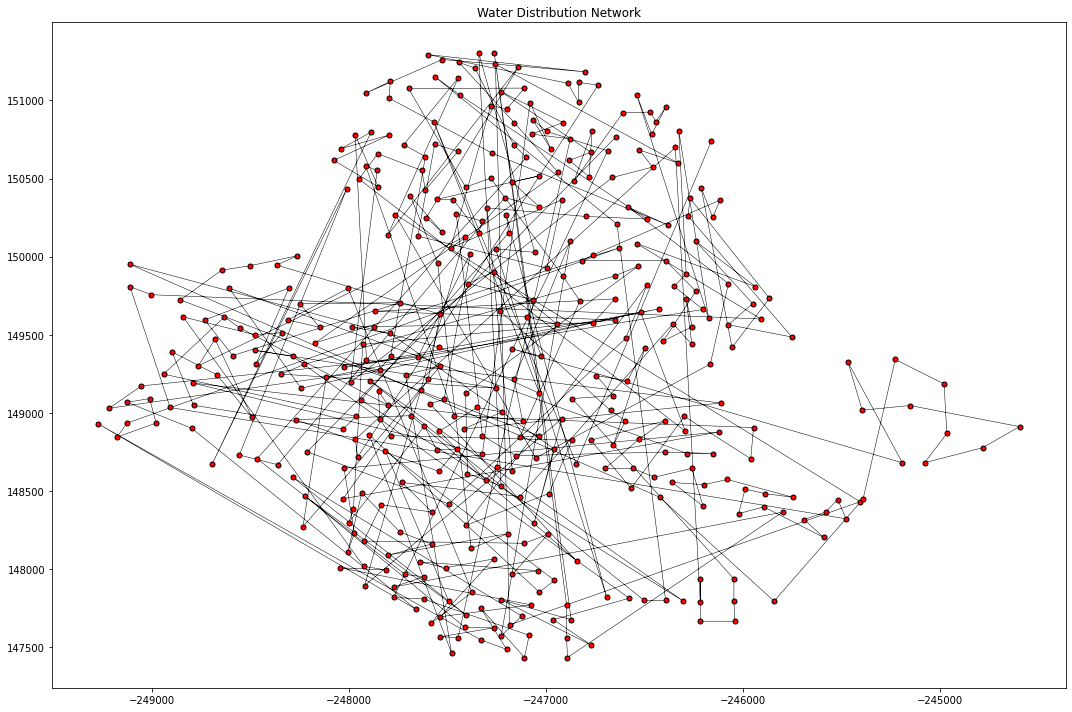

1.0583146992556394
[[('011110100', 1.332556154), ('000001000', 2.036224615), ('100001010', 0.891466154), ('011001010', 1.738204615), ('011000110', 2.491929231), ('011011101', 1.461324231), ('101000100', 1.607618077), ('101000000', 1.274299615), ('110101001', 0.0), ('101011000', 2.171134615), ('010101001', 2.161336154), ('010010100', 2.319041538), ('000010111', 1.481145), ('001110011', 1.884220385), ('001000110', 2.264325), ('011001011', 0.447723462), ('010101100', 2.319708462), ('011100100', 1.534836923), ('000001101', 1.976200385), ('010001110', 1.230414231)], 1.6311854423499998]
10


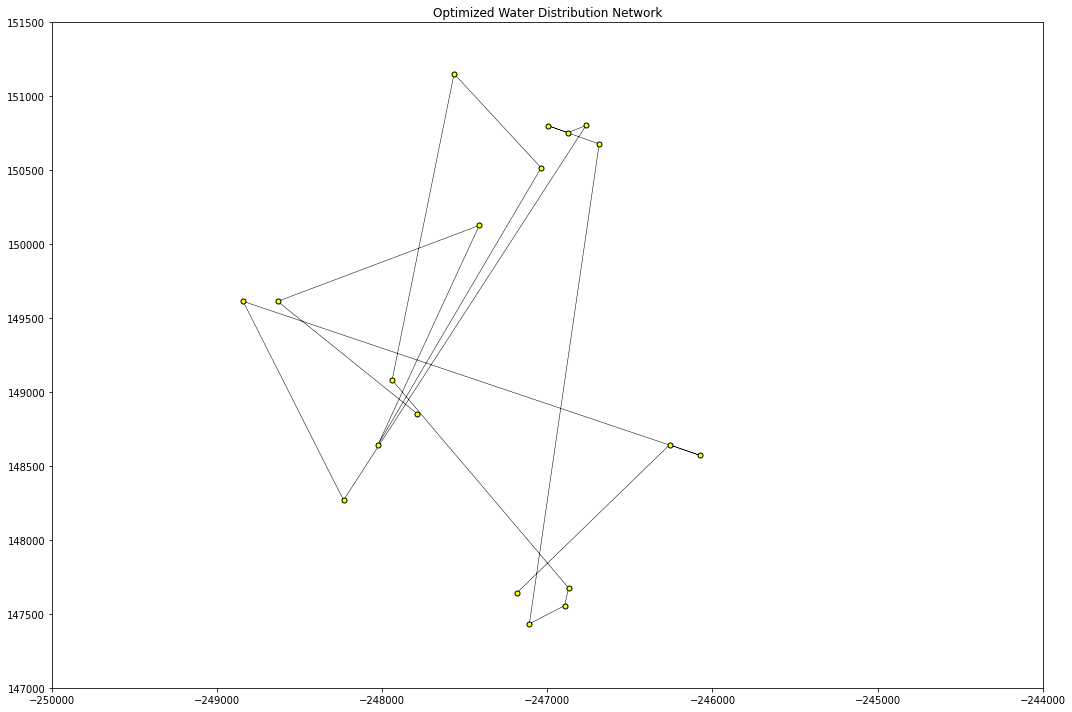

In [3]:
# C:\\Users\\DELL\\Desktop\\Others\\MyProj1.csv
#!/usr/bin/env python
# coding: utf-8
#With population 80
# In[1]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2


# In[2]:


var = pd.read_csv("C:\\Users\\DELL\\Downloads\\Demand_Coverage.csv")
print(var)

# In[3]:


population_size = 0
for i in range(len(var)):
    population_size += 1
print(population_size)


# In[4]:


lst = []
for i in range(0,population_size):
    lst.append(i)
s = pd.Series(lst)
var['Node_No'] = s.values
print(var)

# In[5]:

var4 = pd.read_csv("C:\\Users\\DELL\\Desktop\\Others\\MyProj1.csv")
#print(var4)
x2,y2 = (var4['X-Coord'],var4['Y-Coord'])
plt2.rcParams["figure.figsize"] = (15,10)
plt2.title("Water Distribution Network")
plt2.plot(x2,y2,color='black', linestyle='solid', linewidth = 0.5,
         marker='o', markerfacecolor='red', markersize=5)
plt2.show()

#Function to convert numeric value to Binary String
def Dec_to_bin(key_one):
    if key_one in range(512):
        bin_key_one = f'{key_one:09b}'
        return bin_key_one
    else:
        print("You have to enter key (0 <= key <= 511)")


# In[6]:


# Creation of a list of tuples containing node_no and corresponding demand.
demand = []
demand = var['Demand'].to_list()
node_no = []
node_no = var['Node_No'].to_list()
for i in range(0,len(node_no)):
    node_no[i] = Dec_to_bin(node_no[i])
pop_data = list(zip(node_no,demand))
#print(pop_data)


# In[7]:


#Adding unutilised nodes with demand 0 inside population_data.
import random
for i in range(population_size,512):
    pop_data.append((Dec_to_bin(i),0.0))
# Finding average of total demand of all the nodes in the network in WDNs.
total_demand = 0
for i in range(0,population_size):
    total_demand += demand[i]
average_demand = total_demand/population_size
print(average_demand)


# In[91]:


# Python3 program to create target string, starting from
# random string using Genetic Algorithm

import random

# Number of individuals in each generation
POPULATION_SIZE = 80

# Valid genes
#GENES = '''abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOP
#QRSTUVWXYZ 1234567890, .-;:_!"#%&/()=?@${[]}'''

# Target string to be generated
TARGET = 20

class Individual(object):
	'''
	Class representing individual in population
	'''
	global pop_data
	global average_demand
	def __init__(self, chromosome):
		self.chromosome = chromosome
		self.fitness = self.cal_fitness()

	@classmethod
	def mutated_genes(self):
		'''
		create random genes for mutation
		'''
		#global GENES
		gene = random.choice(pop_data) # In this line, I have to choose a node from 512 nodes ie sensors 
		return gene

	@classmethod
	def create_gnome(self):
		'''
		create chromosome or string of genes
		'''
		#global TARGET
		gnome_len = TARGET
		return [self.mutated_genes() for _ in range(gnome_len)] # gnome_length= no of sensors after optimisation.


	def mate(self, par2):
		'''
		Perform mating and produce new offspring
		'''
		# chromosome for offspring
		child_chromosome = []
		for gp1, gp2 in zip(self.chromosome, par2.chromosome):

			# random probability
			prob = random.random()

			# if prob is less than 0.45, insert gene
			# from parent 1
			if prob < 0.45:
				child_chromosome.append(gp1)

			# if prob is between 0.45 and 0.90, insert
			# gene from parent 2
			elif prob < 0.90:
				child_chromosome.append(gp2)

			# otherwise insert random gene(mutate),
			# for maintaining diversity
			else:
				child_chromosome.append(self.mutated_genes())

		# create new Individual(offspring) using
		# generated chromosome for offspring
		return Individual(child_chromosome)

	def cal_fitness(self):
		'''
		Calculate fitness score, it is the number of
		characters in string which differ from target
		string.
		'''
		global TARGET
		fitness = 0
		for g in self.chromosome:
			fitness = fitness + g[1]
		fitness = fitness/TARGET
		return fitness
# 	gnome = Individual.create_gnome()
# 	print(gnome)
# 	population = []
# 	population.append(Individual(gnome))
# 	print(Individual.get_fitness())

#Driver code
def main():
	global POPULATION_SIZE
	global TARGET
	global average_demand
	#current generation
	generation = 1

	found = False
	population = []
	counter = 0
	temp_pop = []
	# create initial population
	for i in range(POPULATION_SIZE):
				gnome = Individual.create_gnome()   
				population.append([gnome,Individual(gnome).fitness]) # population array containing 50 sets of population of size 20.
# 	population = sorted(population,key = lambda x:x[1],reverse = True)
# # 	print(population[0])
# 	new = []
# 	new.extend(population[:5])
# 	parent1 = random.choice(population[:25])
# 	parent2 = random.choice(population[:25])
# 	print(parent1[0])
    
    
# 	print(parent1)
    
	while not found:

		# sort the population in increasing order of fitness score
		population = sorted(population, key = lambda x:x[1],reverse = True)

		# if the individual having lowest fitness score ie.
		# 0 then we know that we have reached to the target
		# and break the loop
		if population[0][1]/ average_demand >= 1.5:
			found = True
			break

		# Otherwise generate new offsprings for new generation
		new_generation = []

		# Perform Elitism, that mean 10% of fittest population
		# goes to the next generation
		s = int((10*POPULATION_SIZE)/100)
		new_generation.extend(population[:s])

		# From 50% of fittest population, Individuals
		# will mate to produce offspring
		s = int((90*POPULATION_SIZE)/100)
		for _ in range(s):
			parent1 = random.choice(population[:25])
			parent2 = random.choice(population[:25])
			p1 = parent1[0]
			p2 = parent2[0]
			child = []
			for g1 , g2 in zip(p1,p2):
				prob = random.random()
				if prob < 0.45:
					child.append(g1)
				elif prob < 0.90:
					child.append(g2)
				else:
					child.append(random.choice(pop_data))
				child_chromosome = []
				child_chromosome.append([child,Individual(child).fitness])
                    
		new_generation.extend(child_chromosome)
		generation += 1
		population = new_generation
	print(population[0])
	print(generation)
#	print(population[0][0])
	list1 = []
	for i in population[0][0] :
		list1.append(int(i[0],2))
	set1 = set(list1)
	junction = var['Junction'].to_list()   
	node_no = var['Node_No'].to_list()
	ll2 = list(zip(junction,node_no))
	list2=[]
	for j in ll2:
		if j[1] in set1:
			list2.append(j[0])
#	print(list2)
	var1 = pd.read_csv("C:\\Users\\DELL\\Desktop\\Others\\MyProj1.csv")
	junct = var1['Node'].to_list()
	x = var1['X-Coord'].to_list()
	y = var1['Y-Coord'].to_list()
	xx,yy=[],[]    
	set2 = set(list2)    
#	print(set2)    
	llist2 = list(zip(junct,x,y))
#	print(llist2)    
	for i in llist2:
		if i[0] in set2:
			xx.append(i[1])
			yy.append(i[2])
	x,y=xx,yy    
#	print("X:")
#	print(xx)
#	print("Y:")
#	print(yy)    
	plt.title("Optimized Water Distribution Network")
	plt.rcParams["figure.figsize"] = [7.5, 3.5]
	plt.rcParams["figure.autolayout"] = True
	plt.plot(xx,yy,color='black', linestyle='solid', linewidth = 0.5,
         marker='o', markerfacecolor='yellow', markersize=5)
	plt.axis([-250000, -244000, 147000, 151500])
	plt.show()
#		if i[Node_No] in set1:
#			junction.append(i[Junction])

# # 		print("Generation: {}\tString: {}\tFitness: {}".\
# # 			format(generation,
# # 			"".join(population[0].chromosome),
# # 			population[0].fitness))

# # 		generation += 1

	
# # # # 	print("Generation: {}\tString: {}\tFitness: {}".\
# # # # 		format(generation,
# # # # 		"".join(population[0].chromosome),
# # # # 		population[0].fitness))

if __name__ == '__main__':
	main()


# In[ ]:





    Junction  Elevation    Demand   Pattern
0       J511     105.08  1.763868  DMA2_pat
1       J411       8.95  1.333560  DMA1_pat
2       J414      34.36  1.448797  DMA1_pat
3       J415      65.00  0.000000       NaN
4       J416      42.60  0.000000       NaN
..       ...        ...       ...       ...
394       N7      46.30  1.384615  DMA3_pat
395       N8      45.90  0.807692  DMA3_pat
396       N9      45.00  0.980769  DMA3_pat
397      N10      45.10  0.807692  DMA3_pat
398      N11      47.46  0.000000       NaN

[399 rows x 4 columns]
399
    Junction  Elevation    Demand   Pattern  Node_No
0       J511     105.08  1.763868  DMA2_pat        0
1       J411       8.95  1.333560  DMA1_pat        1
2       J414      34.36  1.448797  DMA1_pat        2
3       J415      65.00  0.000000       NaN        3
4       J416      42.60  0.000000       NaN        4
..       ...        ...       ...       ...      ...
394       N7      46.30  1.384615  DMA3_pat      394
395       N8      45

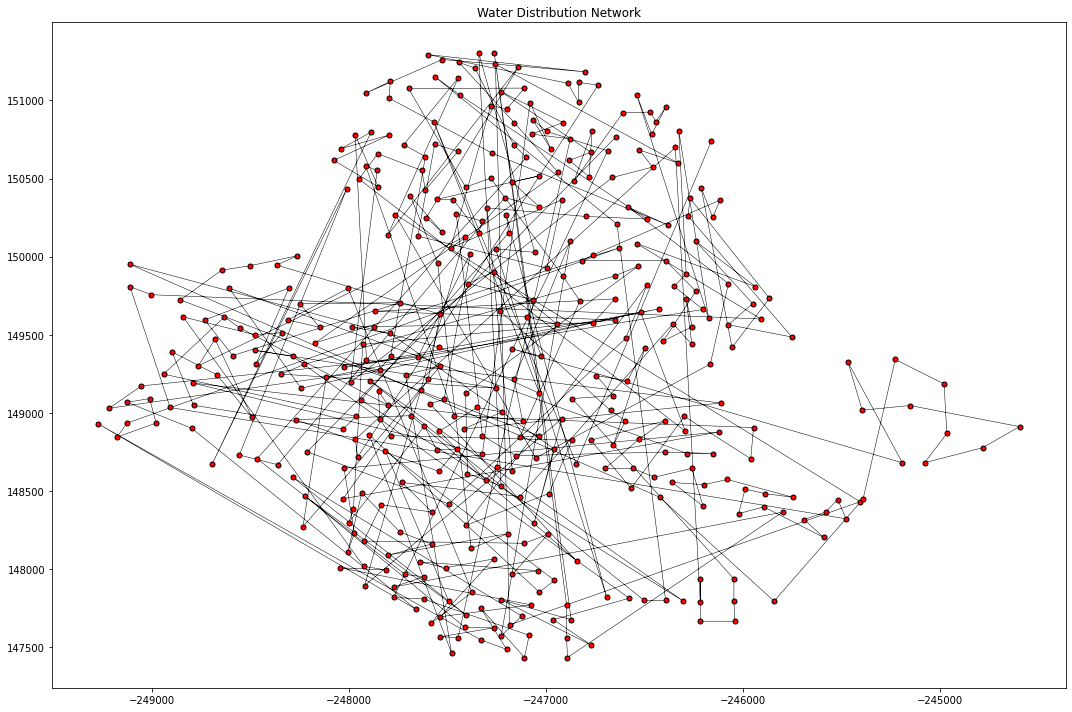

1.0583146992556394
[[('101010101', 2.328898846), ('000000010', 1.448796923), ('010110100', 2.308613077), ('100101100', 1.961221154), ('000011110', 2.074504615), ('010011011', 1.684118077), ('100101100', 1.961221154), ('100000001', 1.077860769), ('011101001', 2.391905769), ('000110110', 2.449573846), ('101011000', 2.171134615), ('000101100', 1.43796), ('010110100', 2.308613077), ('001110100', 1.490236154), ('101000100', 1.607618077), ('001101010', 1.355175), ('011000101', 1.804736538), ('000000101', 1.936849615), ('011100111', 2.01945), ('100100111', 1.751285769)], 1.8784886537500003]
152


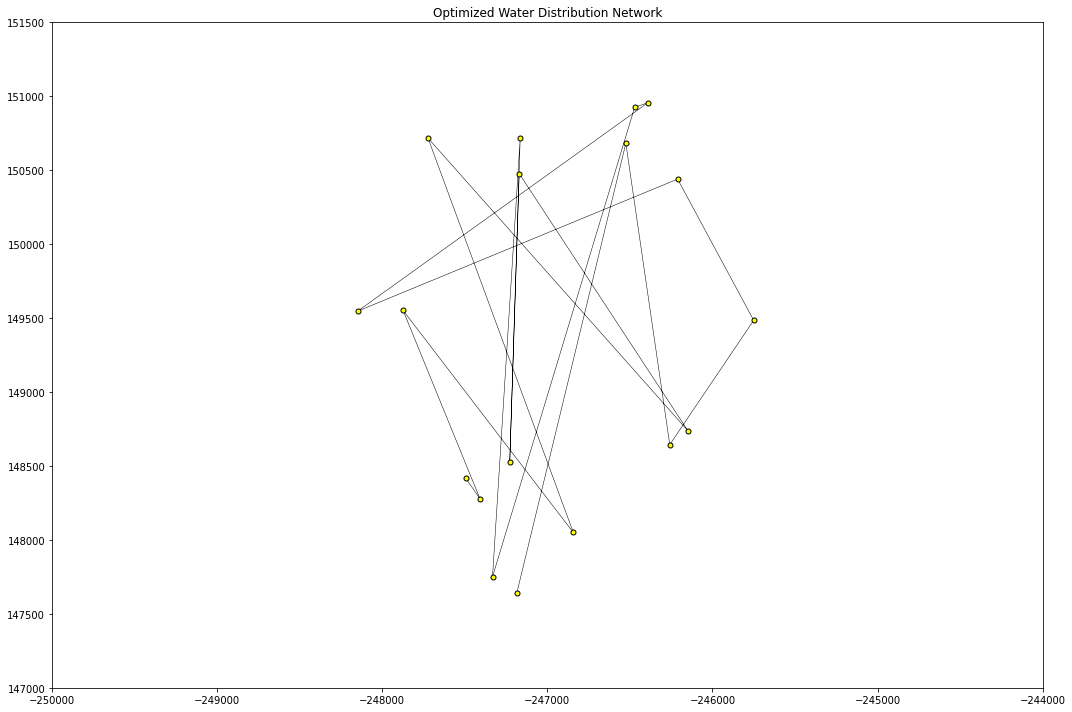

In [5]:
# C:\\Users\\DELL\\Desktop\\Others\\MyProj1.csv
#!/usr/bin/env python
# coding: utf-8
# WITH RATIO = 1.75

# In[1]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2


# In[2]:


var = pd.read_csv("C:\\Users\\DELL\\Downloads\\Demand_Coverage.csv")
print(var)

# In[3]:


population_size = 0
for i in range(len(var)):
    population_size += 1
print(population_size)


# In[4]:


lst = []
for i in range(0,population_size):
    lst.append(i)
s = pd.Series(lst)
var['Node_No'] = s.values
print(var)

# In[5]:

var4 = pd.read_csv("C:\\Users\\DELL\\Desktop\\Others\\MyProj1.csv")
#print(var4)
x2,y2 = (var4['X-Coord'],var4['Y-Coord'])
plt2.rcParams["figure.figsize"] = (15,10)
plt2.title("Water Distribution Network")
plt2.plot(x2,y2,color='black', linestyle='solid', linewidth = 0.5,
         marker='o', markerfacecolor='red', markersize=5)
plt2.show()

#Function to convert numeric value to Binary String
def Dec_to_bin(key_one):
    if key_one in range(512):
        bin_key_one = f'{key_one:09b}'
        return bin_key_one
    else:
        print("You have to enter key (0 <= key <= 511)")


# In[6]:


# Creation of a list of tuples containing node_no and corresponding demand.
demand = []
demand = var['Demand'].to_list()
node_no = []
node_no = var['Node_No'].to_list()
for i in range(0,len(node_no)):
    node_no[i] = Dec_to_bin(node_no[i])
pop_data = list(zip(node_no,demand))
#print(pop_data)


# In[7]:


#Adding unutilised nodes with demand 0 inside population_data.
import random
for i in range(population_size,512):
    pop_data.append((Dec_to_bin(i),0.0))
# Finding average of total demand of all the nodes in the network in WDNs.
total_demand = 0
for i in range(0,population_size):
    total_demand += demand[i]
average_demand = total_demand/population_size
print(average_demand)


# In[91]:


# Python3 program to create target string, starting from
# random string using Genetic Algorithm

import random

# Number of individuals in each generation
POPULATION_SIZE = 50

# Valid genes
#GENES = '''abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOP
#QRSTUVWXYZ 1234567890, .-;:_!"#%&/()=?@${[]}'''

# Target string to be generated
TARGET = 20

class Individual(object):
	'''
	Class representing individual in population
	'''
	global pop_data
	global average_demand
	def __init__(self, chromosome):
		self.chromosome = chromosome
		self.fitness = self.cal_fitness()

	@classmethod
	def mutated_genes(self):
		'''
		create random genes for mutation
		'''
		#global GENES
		gene = random.choice(pop_data) # In this line, I have to choose a node from 512 nodes ie sensors 
		return gene

	@classmethod
	def create_gnome(self):
		'''
		create chromosome or string of genes
		'''
		#global TARGET
		gnome_len = TARGET
		return [self.mutated_genes() for _ in range(gnome_len)] # gnome_length= no of sensors after optimisation.


	def mate(self, par2):
		'''
		Perform mating and produce new offspring
		'''
		# chromosome for offspring
		child_chromosome = []
		for gp1, gp2 in zip(self.chromosome, par2.chromosome):

			# random probability
			prob = random.random()

			# if prob is less than 0.45, insert gene
			# from parent 1
			if prob < 0.45:
				child_chromosome.append(gp1)

			# if prob is between 0.45 and 0.90, insert
			# gene from parent 2
			elif prob < 0.90:
				child_chromosome.append(gp2)

			# otherwise insert random gene(mutate),
			# for maintaining diversity
			else:
				child_chromosome.append(self.mutated_genes())

		# create new Individual(offspring) using
		# generated chromosome for offspring
		return Individual(child_chromosome)

	def cal_fitness(self):
		'''
		Calculate fitness score, it is the number of
		characters in string which differ from target
		string.
		'''
		global TARGET
		fitness = 0
		for g in self.chromosome:
			fitness = fitness + g[1]
		fitness = fitness/TARGET
		return fitness
# 	gnome = Individual.create_gnome()
# 	print(gnome)
# 	population = []
# 	population.append(Individual(gnome))
# 	print(Individual.get_fitness())

#Driver code
def main():
	global POPULATION_SIZE
	global TARGET
	global average_demand
	#current generation
	generation = 1

	found = False
	population = []
	counter = 0
	temp_pop = []
	# create initial population
	for i in range(POPULATION_SIZE):
				gnome = Individual.create_gnome()   
				population.append([gnome,Individual(gnome).fitness]) # population array containing 50 sets of population of size 20.
# 	population = sorted(population,key = lambda x:x[1],reverse = True)
# # 	print(population[0])
# 	new = []
# 	new.extend(population[:5])
# 	parent1 = random.choice(population[:25])
# 	parent2 = random.choice(population[:25])
# 	print(parent1[0])
    
    
# 	print(parent1)
    
	while not found:

		# sort the population in increasing order of fitness score
		population = sorted(population, key = lambda x:x[1],reverse = True)

		# if the individual having lowest fitness score ie.
		# 0 then we know that we have reached to the target
		# and break the loop
		if population[0][1]/ average_demand >= 1.75:
			found = True
			break

		# Otherwise generate new offsprings for new generation
		new_generation = []

		# Perform Elitism, that mean 10% of fittest population
		# goes to the next generation
		s = int((10*POPULATION_SIZE)/100)
		new_generation.extend(population[:s])

		# From 50% of fittest population, Individuals
		# will mate to produce offspring
		s = int((90*POPULATION_SIZE)/100)
		for _ in range(s):
			parent1 = random.choice(population[:25])
			parent2 = random.choice(population[:25])
			p1 = parent1[0]
			p2 = parent2[0]
			child = []
			for g1 , g2 in zip(p1,p2):
				prob = random.random()
				if prob < 0.45:
					child.append(g1)
				elif prob < 0.90:
					child.append(g2)
				else:
					child.append(random.choice(pop_data))
				child_chromosome = []
				child_chromosome.append([child,Individual(child).fitness])
                    
		new_generation.extend(child_chromosome)
		generation += 1
		population = new_generation
	print(population[0])
	print(generation)
#	print(population[0][0])
	list1 = []
	for i in population[0][0] :
		list1.append(int(i[0],2))
	set1 = set(list1)
	junction = var['Junction'].to_list()   
	node_no = var['Node_No'].to_list()
	ll2 = list(zip(junction,node_no))
	list2=[]
	for j in ll2:
		if j[1] in set1:
			list2.append(j[0])
#	print(list2)
	var1 = pd.read_csv("C:\\Users\\DELL\\Desktop\\Others\\MyProj1.csv")
	junct = var1['Node'].to_list()
	x = var1['X-Coord'].to_list()
	y = var1['Y-Coord'].to_list()
	xx,yy=[],[]    
	set2 = set(list2)    
#	print(set2)    
	llist2 = list(zip(junct,x,y))
#	print(llist2)    
	for i in llist2:
		if i[0] in set2:
			xx.append(i[1])
			yy.append(i[2])
	x,y=xx,yy    
#	print("X:")
#	print(xx)
#	print("Y:")
#	print(yy)    
	plt.title("Optimized Water Distribution Network")
	plt.rcParams["figure.figsize"] = [7.5, 3.5]
	plt.rcParams["figure.autolayout"] = True
	plt.plot(xx,yy,color='black', linestyle='solid', linewidth = 0.5,
         marker='o', markerfacecolor='yellow', markersize=5)
	plt.axis([-250000, -244000, 147000, 151500])
	plt.show()
#		if i[Node_No] in set1:
#			junction.append(i[Junction])

# # 		print("Generation: {}\tString: {}\tFitness: {}".\
# # 			format(generation,
# # 			"".join(population[0].chromosome),
# # 			population[0].fitness))

# # 		generation += 1

	
# # # # 	print("Generation: {}\tString: {}\tFitness: {}".\
# # # # 		format(generation,
# # # # 		"".join(population[0].chromosome),
# # # # 		population[0].fitness))

if __name__ == '__main__':
	main()


# In[ ]:



